# Runge Phenomenon Analysis and Interpolation Comparison

This notebook demonstrates the Runge phenomenon and compares polynomial interpolation using:
1. Equally spaced interpolation points
2. Chebyshev nodes of the first kind

We'll analyze both the classic Runge function and sin(x) with varying numbers of interpolation points from 10 to 10,000.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, BarycentricInterpolator, interp1d
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters for better visualization
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


In [3]:
def lagrange_interpolation(x_points, y_points, x_eval):
    """
    Perform Lagrange polynomial interpolation using scipy
    """
    poly = lagrange(x_points, y_points)
    return poly(x_eval)

def generate_chebyshev_nodes(n, a=-1, b=1):
    """
    Generate n Chebyshev nodes of the first kind on interval [a, b]
    Chebyshev nodes: x_k = cos((2k-1)π/(2n)) for k = 1, 2, ..., n
    """
    k = np.arange(1, n+1)
    nodes = np.cos((2*k - 1) * np.pi / (2*n))
    # Transform from [-1, 1] to [a, b]
    return (b - a) / 2 * nodes + (a + b) / 2

def runge_function(x):
    """
    The classic Runge function: f(x) = 1 / (1 + x²)
    """
    return 1 / (1 +  20*x**2)

def evaluate_interpolation_error(true_func, x_points, y_points, x_eval):
    """
    Evaluate the interpolation error
    """
    poly = lagrange(x_points, y_points)
    y_interp = poly(x_eval)
    y_true = true_func(x_eval)
    return np.abs(y_true - y_interp)



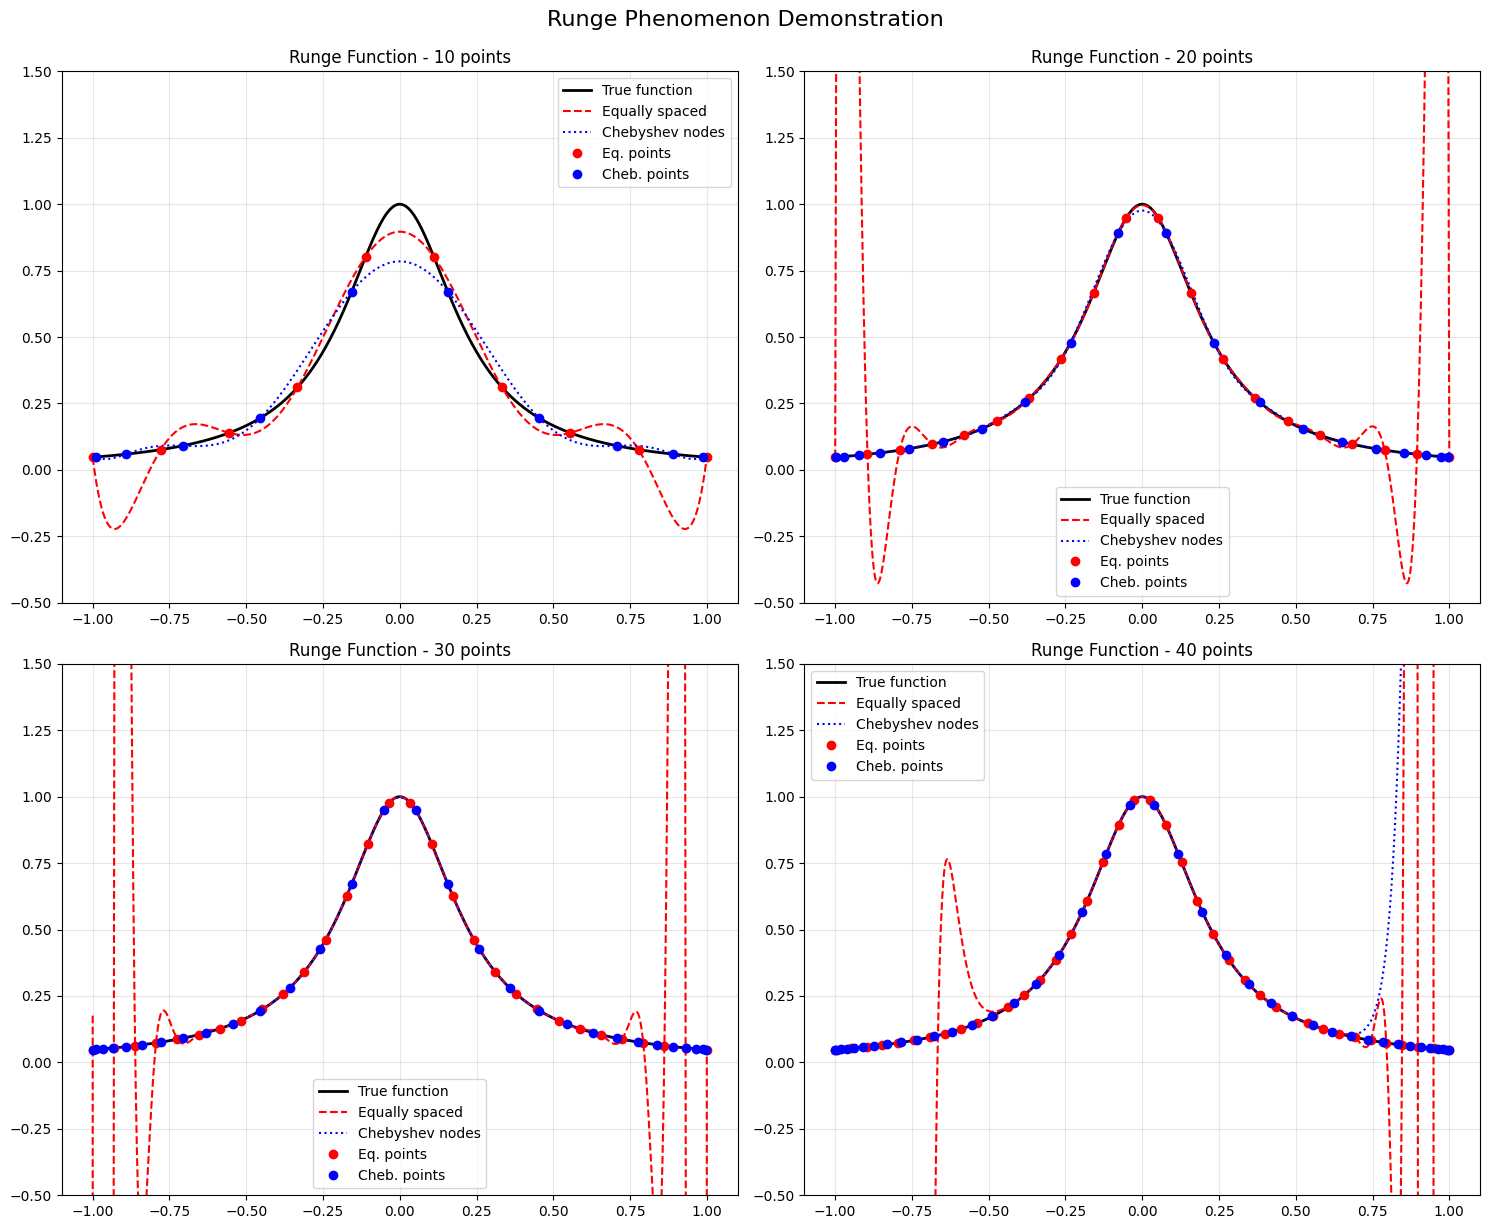

In [4]:
# Demonstrate Runge Phenomenon with the classic function
interval = [-1, 1]
x_fine = np.linspace(interval[0], interval[1], 1000)
y_true_runge = runge_function(x_fine)

# Test with different numbers of equally spaced points
n_points_list = [10, 20, 30, 40]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, n in enumerate(n_points_list):
    # Equally spaced points
    x_eq = np.linspace(interval[0], interval[1], n)
    y_eq = runge_function(x_eq)
    
    # Chebyshev points
    x_cheb = generate_chebyshev_nodes(n, interval[0], interval[1])
    y_cheb = runge_function(x_cheb)
    
    # Interpolation
    y_interp_eq = lagrange_interpolation(x_eq, y_eq, x_fine)
    y_interp_cheb = lagrange_interpolation(x_cheb, y_cheb, x_fine)
    
    # Plot
    axes[i].plot(x_fine, y_true_runge, 'k-', linewidth=2, label='True function')
    axes[i].plot(x_fine, y_interp_eq, 'r--', linewidth=1.5, label='Equally spaced')
    axes[i].plot(x_fine, y_interp_cheb, 'b:', linewidth=1.5, label='Chebyshev nodes')
    axes[i].plot(x_eq, y_eq, 'ro', markersize=6, label='Eq. points')
    axes[i].plot(x_cheb, y_cheb, 'bo', markersize=6, label='Cheb. points')
    axes[i].set_title(f'Runge Function - {n} points')
    axes[i].set_ylim(-0.5, 1.5)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Runge Phenomenon Demonstration', fontsize=16, y=1.02)
plt.show()

In [5]:
# Analysis of sin(x) interpolation on [0, 1]
interval_sin = [0, 1]
x_fine_sin = np.linspace(interval_sin[0], interval_sin[1], 10000)
y_true_sin = np.sin(x_fine_sin)

# Test with different numbers of interpolation points (practical range)
n_points_sin = [10, 20, 30,40,50]

# Calculate maximum errors
max_errors_eq = []
max_errors_cheb = []

print("sin(x) Interpolation Analysis on [0, 1]")
print("="*50)
print(f"{'Points':<8} {'Max Error (Eq.)':<15} {'Max Error (Cheb.)':<15}")
print("-"*50)

for n in n_points_sin:
    # Equally spaced points
    x_eq = np.linspace(interval_sin[0], interval_sin[1], n)
    y_eq = np.sin(x_eq)
    
    # Chebyshev points (transformed to [0, 1])
    x_cheb = generate_chebyshev_nodes(n, interval_sin[0], interval_sin[1])
    y_cheb = np.sin(x_cheb)
    
    # Interpolation with timeout protection
    try:
        # Use barycentric interpolation for better numerical stability
        from scipy.interpolate import BarycentricInterpolator
        
        interp_eq = BarycentricInterpolator(x_eq, y_eq)
        interp_cheb = BarycentricInterpolator(x_cheb, y_cheb)
        
        y_interp_eq = interp_eq(x_fine_sin)
        y_interp_cheb = interp_cheb(x_fine_sin)
        
        # Calculate errors
        error_eq = np.abs(y_true_sin - y_interp_eq)
        error_cheb = np.abs(y_true_sin - y_interp_cheb)
        
        max_error_eq = np.max(error_eq)
        max_error_cheb = np.max(error_cheb)
        
        max_errors_eq.append(max_error_eq)
        max_errors_cheb.append(max_error_cheb)
        
        print(f"{n:<8} {max_error_eq:<15.2e} {max_error_cheb:<15.2e}")
        
    except Exception as e:
        print(f"{n:<8} Error: {str(e)[:30]}")
        max_errors_eq.append(np.nan)
        max_errors_cheb.append(np.nan)

sin(x) Interpolation Analysis on [0, 1]
Points   Max Error (Eq.) Max Error (Cheb.)
--------------------------------------------------
10       1.74e-12        2.71e-13       
20       8.16e-13        5.55e-16       
30       5.22e-10        5.55e-16       
40       2.48e-07        5.55e-16       
50       2.40e-04        6.66e-16       


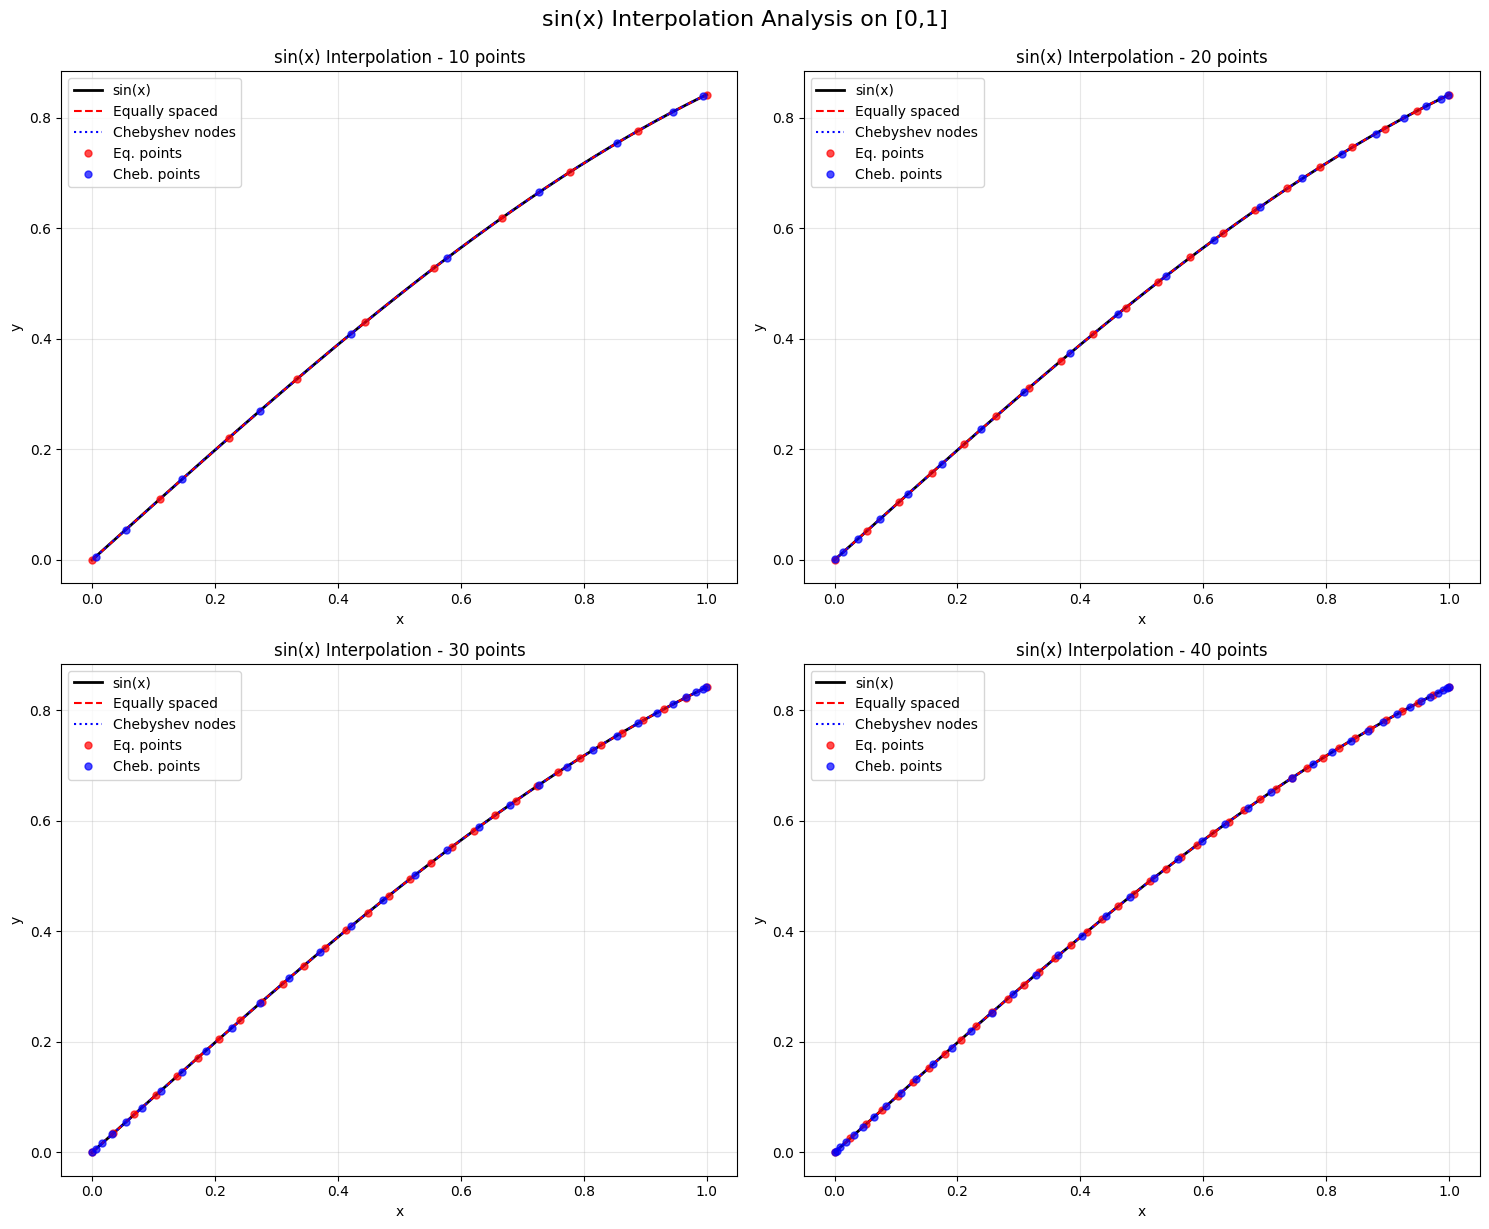

In [6]:
# Visualize sin(x) interpolation for selected numbers of points
selected_points = [10, 20, 30,40]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, n in enumerate(selected_points):
    # Equally spaced points
    x_eq = np.linspace(interval_sin[0], interval_sin[1], n)
    y_eq = np.sin(x_eq)
    
    # Chebyshev points
    x_cheb = generate_chebyshev_nodes(n, interval_sin[0], interval_sin[1])
    y_cheb = np.sin(x_cheb)
    
    # Interpolation using barycentric interpolator for stability
    try:
        from scipy.interpolate import BarycentricInterpolator
        
        interp_eq = BarycentricInterpolator(x_eq, y_eq)
        interp_cheb = BarycentricInterpolator(x_cheb, y_cheb)
        
        y_interp_eq = interp_eq(x_fine_sin)
        y_interp_cheb = interp_cheb(x_fine_sin)
        
        # Plot
        axes[i].plot(x_fine_sin, y_true_sin, 'k-', linewidth=2, label='sin(x)')
        axes[i].plot(x_fine_sin, y_interp_eq, 'r--', linewidth=1.5, label='Equally spaced')
        axes[i].plot(x_fine_sin, y_interp_cheb, 'b:', linewidth=1.5, label='Chebyshev nodes')
        
        # Show interpolation points
        axes[i].plot(x_eq, y_eq, 'ro', markersize=5, alpha=0.7, label='Eq. points')
        axes[i].plot(x_cheb, y_cheb, 'bo', markersize=5, alpha=0.7, label='Cheb. points')
        
        axes[i].set_title(f'sin(x) Interpolation - {n} points')
        axes[i].set_xlabel('x')
        axes[i].set_ylabel('y')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
    except Exception as e:
        axes[i].text(0.5, 0.5, f'Error with {n} points\n{str(e)[:20]}', 
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[i].transAxes)
        axes[i].set_title(f'sin(x) - {n} points (Error)')

plt.tight_layout()
plt.suptitle('sin(x) Interpolation Analysis on [0,1]', fontsize=16, y=1.02)
plt.show()

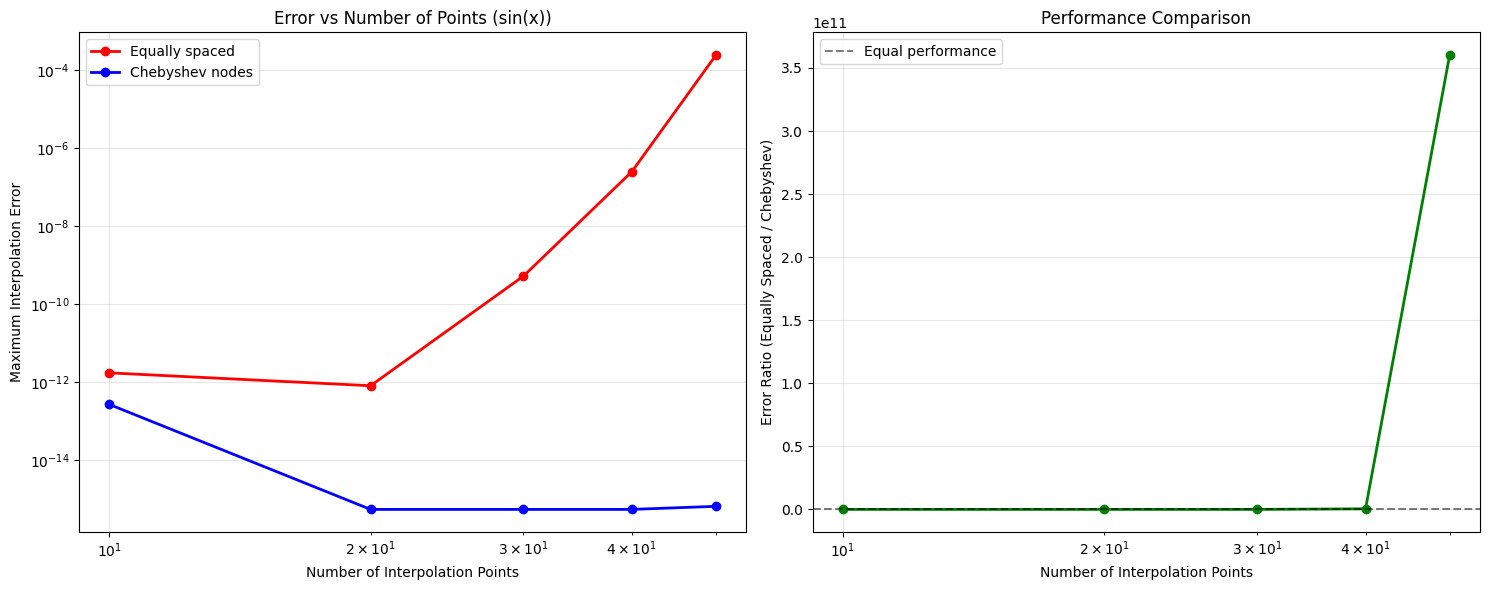


Summary Statistics:
Average error ratio: 72143025012.96
Maximum error ratio: 360267166504.61
Minimum error ratio: 6.43


In [7]:
# Error analysis plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Filter out NaN values for plotting
valid_indices = ~(np.isnan(max_errors_eq) | np.isnan(max_errors_cheb))
valid_points = np.array(n_points_sin)[valid_indices]
valid_errors_eq = np.array(max_errors_eq)[valid_indices]
valid_errors_cheb = np.array(max_errors_cheb)[valid_indices]

# Plot 1: Error vs Number of Points (log scale)
ax1.loglog(valid_points, valid_errors_eq, 'ro-', label='Equally spaced', linewidth=2, markersize=6)
ax1.loglog(valid_points, valid_errors_cheb, 'bo-', label='Chebyshev nodes', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Interpolation Points')
ax1.set_ylabel('Maximum Interpolation Error')
ax1.set_title('Error vs Number of Points (sin(x))')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Error ratio (Equally spaced / Chebyshev)
error_ratio = valid_errors_eq / valid_errors_cheb
ax2.semilogx(valid_points, error_ratio, 'go-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Interpolation Points')
ax2.set_ylabel('Error Ratio (Equally Spaced / Chebyshev)')
ax2.set_title('Performance Comparison')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=1, color='k', linestyle='--', alpha=0.5, label='Equal performance')
ax2.legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print("="*50)
print(f"Average error ratio: {np.mean(error_ratio):.2f}")
print(f"Maximum error ratio: {np.max(error_ratio):.2f}")
print(f"Minimum error ratio: {np.min(error_ratio):.2f}")


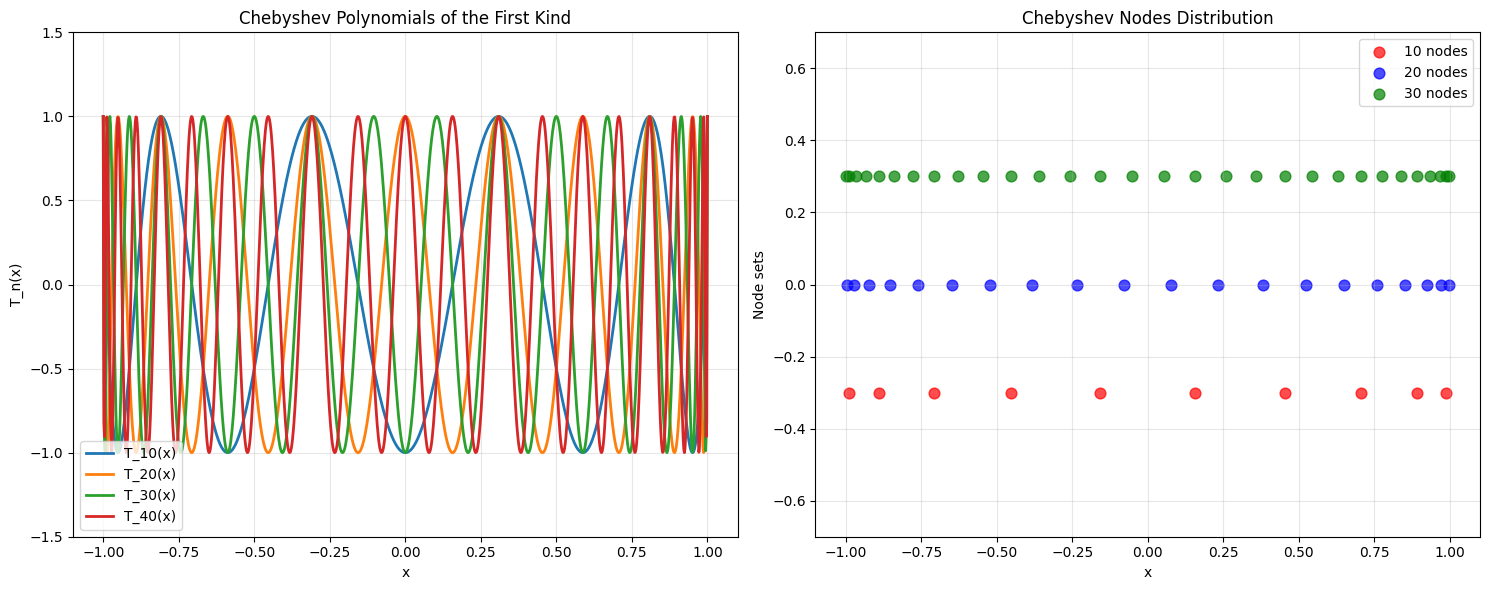

In [8]:
# Demonstrate Chebyshev polynomial properties
from scipy.special import chebyt

# Generate Chebyshev polynomials of different degrees
x = np.linspace(-1, 1, 1000)
degrees = [10, 20, 30, 40]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Chebyshev polynomials
for degree in degrees:
    T_n = chebyt(degree)
    y = T_n(x)
    ax1.plot(x, y, label=f'T_{degree}(x)', linewidth=2)

ax1.set_xlabel('x')
ax1.set_ylabel('T_n(x)')
ax1.set_title('Chebyshev Polynomials of the First Kind')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1.5, 1.5)

# Show Chebyshev nodes for different degrees
degrees_nodes = [10,20, 30]
colors = ['red', 'blue', 'green']

for i, (degree, color) in enumerate(zip(degrees_nodes, colors)):
    nodes = generate_chebyshev_nodes(degree)
    y_pos = np.ones_like(nodes) * (i * 0.3 - 0.3)
    ax2.scatter(nodes, y_pos, c=color, s=60, alpha=0.7, label=f'{degree} nodes')

ax2.set_xlabel('x')
ax2.set_ylabel('Node sets')
ax2.set_title('Chebyshev Nodes Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-0.7, 0.7)

plt.tight_layout()
plt.show()

